<a href="https://colab.research.google.com/github/dorinhazan/Human-Activity-Recognition-Using-Smartphones/blob/main/Activity_recognition_using_smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 6.9 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.inspection import permutation_importance


In [13]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [14]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [15]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [16]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [17]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [18]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

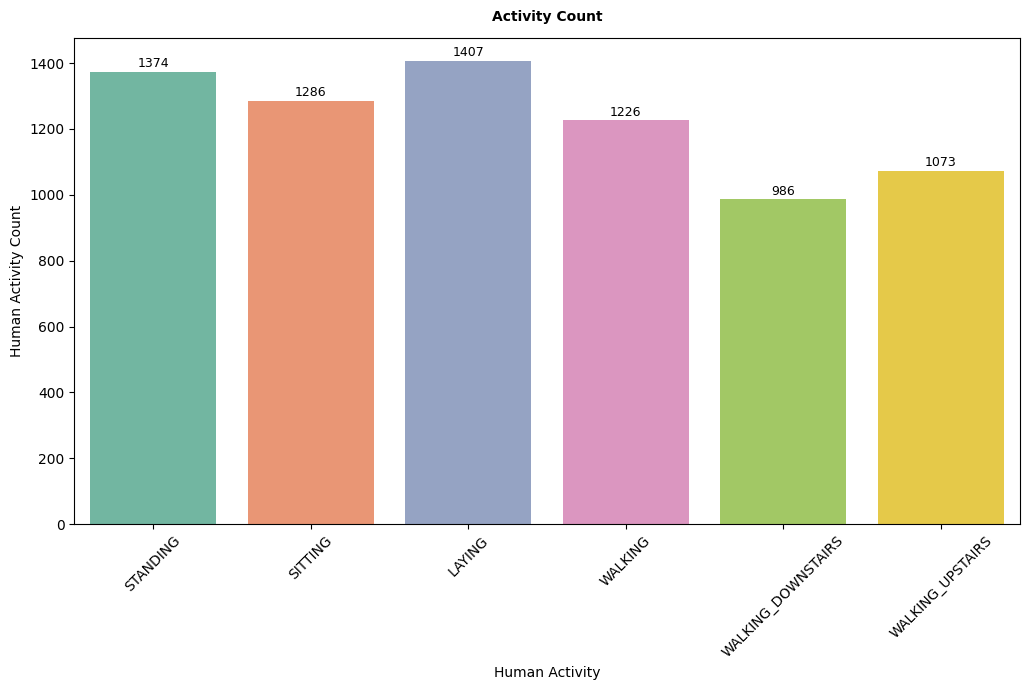

In [19]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(20, 7))

# Bar Chart
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=train_data, x='Activity', palette='Set2')
plt.title("Activity Count", pad=12, fontsize=10, fontweight='bold')
plt.xlabel('Human Activity')
plt.ylabel('Human Activity Count')
plt.xticks(rotation=45)

# Manually annotate each bar with its count
for patch in ax1.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax1.text(
        x, height + 5,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


Subject Distribution Graph

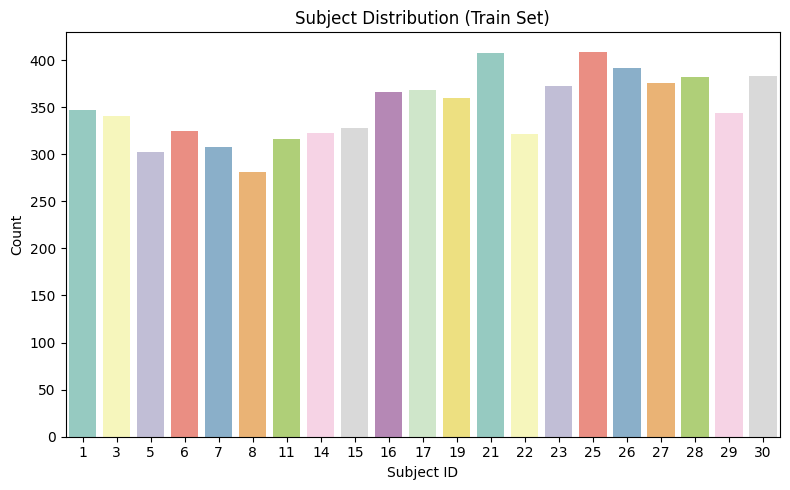

In [22]:
# 3) Subject distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='subject', palette='Set3')
plt.title('Subject Distribution (Train Set)')
plt.xlabel('Subject ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
X_train = train_data.drop(columns=['subject', 'Activity'])
y_train = train_data['Activity']
X_test  = test_data.drop(columns=['subject', 'Activity'])
y_test  = test_data['Activity']

Feature Importance

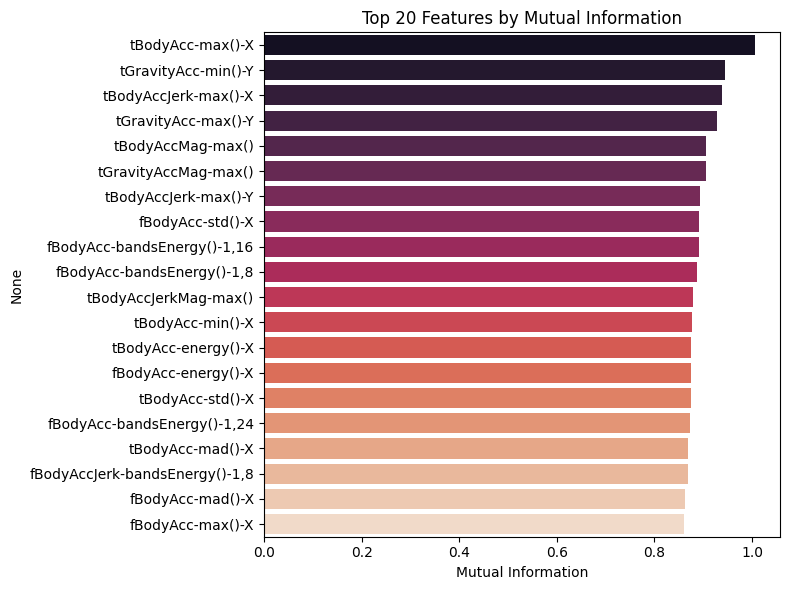

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# ───────────────────────────────────────────────────────────────
# 1) Mutual-Information (MI) scores
# ───────────────────────────────────────────────────────────────
mi_raw = mutual_info_classif(X_train, y_train, random_state=42)
mi_ser = pd.Series(mi_raw, index=X_train.columns, name="mi")

# (plot – optional)
mi_top = mi_ser.sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
sns.barplot(x=mi_top.values, y=mi_top.index, palette="rocket")
plt.title("Top 20 Features by Mutual Information")
plt.xlabel("Mutual Information")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────
# 2) Random-Forest importances
# ───────────────────────────────────────────────────────────────
rf = RandomForestClassifier(
    n_estimators=200, n_jobs=-1, random_state=42
)
rf.fit(X_train, y_train)

imp_ser = pd.Series(rf.feature_importances_, index=X_train.columns, name="rf")

# (plot – optional)
imp_top = imp_ser.sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
sns.barplot(x=imp_top.values, y=imp_top.index, palette="mako")
plt.title("Top 20 Features by RF Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────
# 3) Assemble the master score table
# ───────────────────────────────────────────────────────────────
feat_df = pd.concat([mi_ser, imp_ser], axis=1)

# ───────────────────────────────────────────────────────────────
# 4) Convert importances → normalised weights (sum = 1)
# ───────────────────────────────────────────────────────────────
weights = (
    feat_df.clip(lower=0)                        # guard against negatives
            .apply(lambda col: col / col.sum()   # normalise
                   if col.sum() > 0
                   else np.zeros_like(col))
)

# Give equal prior to MI and RF; change .mean(axis=1) to a weighted
# average if you want to favour one metric.
weights["avg"] = weights.mean(axis=1)

# ───────────────────────────────────────────────────────────────
# 5) Cumulative-share cut-off
# ───────────────────────────────────────────────────────────────
target_share = 0.90
cum_share = weights["avg"].sort_values(ascending=False).cumsum()

selected_features = cum_share[cum_share <= target_share].index.tolist()
actual_share = cum_share.loc[selected_features[-1]] if selected_features else 0

print(f"{len(selected_features)} features capture "
      f"{actual_share:.1%} of total importance "
      f"(target ≥ {target_share:.0%})")

# selected_features is now ready for X_train[selected_features]


Creating A Base Model With PCA

Creating A Base Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Convert your data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class ActivityClassifier(nn.Module):
    def __init__(self, input_dim):
        super(ActivityClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 6)  # 6 output classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
input_dim = x_train.shape[1]
model = ActivityClassifier(input_dim)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1/10, Loss: 0.5469
Epoch 2/10, Loss: 0.1979
Epoch 3/10, Loss: 0.1391
Epoch 4/10, Loss: 0.1261
Epoch 5/10, Loss: 0.1168
Epoch 6/10, Loss: 0.0997
Epoch 7/10, Loss: 0.0949
Epoch 8/10, Loss: 0.0843
Epoch 9/10, Loss: 0.0793
Epoch 10/10, Loss: 0.0814
Test Accuracy: 94.77%
